In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

np.bool8 = np.bool_

In [25]:
df_5_features = pd.read_excel('data-5features-all-outputs.xlsx')
df_30_features = pd.read_excel('data-30-features-all-outputs.xlsx')
df_all_features = pd.read_excel('All_data_correct.xlsx')
df_all_features.drop(columns=["Responsibility", "Listening_skills", "Questioning_skills", "Team_participation", "Teamwork_oriented"], inplace=True)
df_5_features = df_5_features.iloc[:,2:]
df_all_features = df_all_features.iloc[:, 2:]

id_mapping = {
    'CIL CFT12': 'CFT12',
    'RM CFT59': 'CFT59'
}

df_all_features['StandardizedTeamID'] = df_all_features['Team ID'].replace(id_mapping)

df_se1 = df_all_features.loc[(df_all_features['country data collected'] == 'Sweden') & (df_all_features['Data source'] == 'Ericsson 2018')].reset_index(drop=True)
df_se2 = df_all_features.loc[(df_all_features['country data collected'] == 'Sweden') & (df_all_features['Data source'] == 'Ericsson 2020')].reset_index(drop=True)
df_bz = df_all_features.loc[(df_all_features['country data collected'] == 'Brazil') & (df_all_features['Data source'] == 'Brazil 2021')].reset_index(drop=True)
df_in = df_all_features.loc[df_all_features['country data collected'] == 'India'].reset_index(drop=True)

In [3]:
# from ydata_profiling import ProfileReport
# profile30 = ProfileReport(df_30_features, title="Report 30 features")
# profile30.to_file('report30.html')

In [4]:
df_all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data source             282 non-null    object 
 1   country data collected  282 non-null    object 
 2   Role                    282 non-null    object 
 3   Team ID                 282 non-null    object 
 4   Gender                  282 non-null    object 
 5   Age                     282 non-null    int64  
 6   Country                 282 non-null    object 
 7   Extraversion            282 non-null    int64  
 8   Friendliness            282 non-null    int64  
 9   Gregariousness          282 non-null    int64  
 10  Assertiveness           282 non-null    int64  
 11  Activity Level          282 non-null    int64  
 12  Excitement-Seeking      282 non-null    int64  
 13  Cheerfulness            282 non-null    int64  
 14  Agreeableness           282 non-null    in

In [5]:
print("Before dropping duplicates: ", df_30_features.shape)
print("After dropping duplicates: ", df_30_features.drop_duplicates().shape)
print("Total Missing Values: ", df_30_features.isna().sum().sum())

Before dropping duplicates:  (282, 35)
After dropping duplicates:  (282, 35)
Total Missing Values:  0


In [6]:
df_30_features.describe()

,Friendliness,Gregariousness,Assertiveness,Activity Level,Excitement-Seeking,Cheerfulness,Trust,Morality,Altruism,Cooperation,...,Artistic Interests,Emotionality,Adventurousness,Intellect,Liberalism,Vision,Task_Orientation,Support_for_innovation,Participative_safety,Team_Climate
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,56.507092,46.386525,44.070922,55.145390,34.503546,55.819149,62.294326,62.773050,58.024823,57.333333,...,38.354610,42.478723,42.570922,36.262411,56.180851,3.998066,3.918946,3.838652,4.111998,3.972684
std,25.282355,28.919502,25.674155,23.034327,23.916558,24.478895,24.859933,25.145801,24.909718,20.602721,...,26.341079,24.010257,26.542592,25.923964,20.457036,0.589704,0.745735,0.773151,0.724433,0.604523
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.181818,1.571429,1.250000,1.000000,1.520000
25%,37.000000,21.000000,25.000000,38.000000,13.250000,37.000000,42.000000,50.000000,38.000000,44.000000,...,14.500000,22.000000,19.000000,10.000000,43.000000,3.636364,3.464286,3.406250,3.750000,3.645000
50%,56.000000,46.000000,45.500000,60.000000,36.000000,57.000000,68.500000,72.000000,57.000000,63.000000,...,39.000000,43.000000,38.000000,37.000000,58.000000,4.045455,4.000000,4.000000,4.250000,4.015000
75%,77.000000,72.000000,63.000000,70.000000,56.000000,76.000000,79.000000,81.000000,80.000000,72.000000,...,60.000000,64.000000,58.000000,59.000000,71.000000,4.363636,4.428571,4.375000,4.666667,4.437500
max,98.000000,99.000000,95.000000,99.000000,99.000000,97.000000,99.000000,89.000000,95.000000,93.000000,...,94.000000,97.000000,98.000000,87.000000,99.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df_new = df_5_features.copy()
df_new.corr(method='pearson')

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Vision,Task_Orientation,Support_for_innovation,Participative_safety,Team_Climate
Extraversion,1.000000,0.110837,0.367358,-0.426170,0.343027,0.131552,0.128766,0.086496,0.104110,0.130429
Agreeableness,0.110837,1.000000,0.339936,-0.184799,0.255881,0.264403,0.153887,0.167490,0.194057,0.228179
Conscientiousness,0.367358,0.339936,1.000000,-0.504311,0.118425,0.171705,0.114224,0.079047,0.200272,0.172315
Neuroticism,-0.426170,-0.184799,-0.504311,1.000000,-0.150372,-0.092397,-0.133970,-0.110559,-0.160671,-0.142087
Openness,0.343027,0.255881,0.118425,-0.150372,1.000000,-0.022159,0.029244,0.057807,0.075613,0.047521
Vision,0.131552,0.264403,0.171705,-0.092397,-0.022159,1.000000,0.636732,0.624632,0.618404,0.813489
Task_Orientation,0.128766,0.153887,0.114224,-0.133970,0.029244,0.636732,1.000000,0.773350,0.707124,0.891398
Support_for_innovation,0.086496,0.167490,0.079047,-0.110559,0.057807,0.624632,0.773350,1.000000,0.698796,0.880635
Participative_safety,0.104110,0.194057,0.200272,-0.160671,0.075613,0.618404,0.707124,0.698796,1.000000,0.876434
Team_Climate,0.130429,0.228179,0.172315,-0.142087,0.047521,0.813489,0.891398,0.880635,0.876434,1.000000


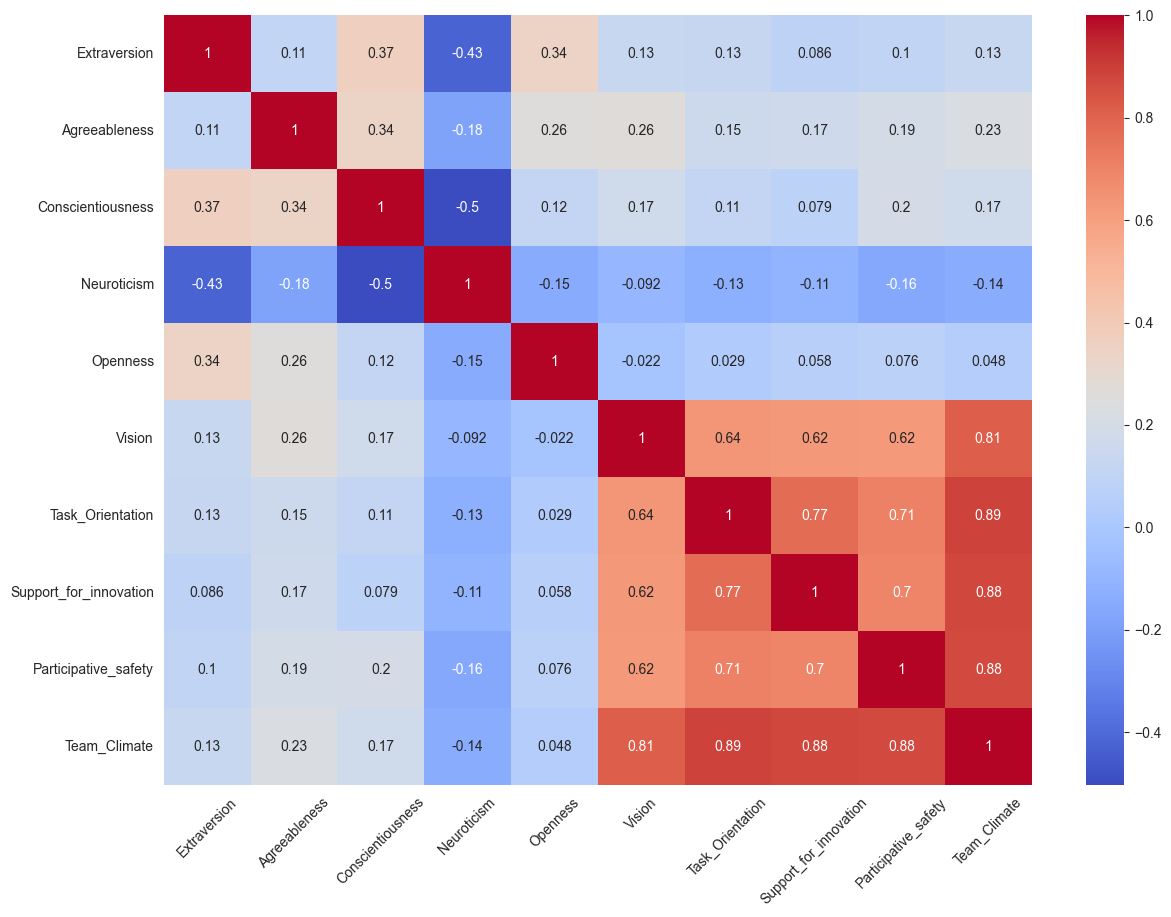

In [8]:
plt.figure(figsize = (14,10))
sns.heatmap(df_new.corr(method = 'pearson'), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix of Big Five Model personalities traits with Team Climate metrics')
plt.xticks(rotation=45)
plt.savefig('./images/correlation_matrix_5.png')
plt.show()

# Data Visualisation

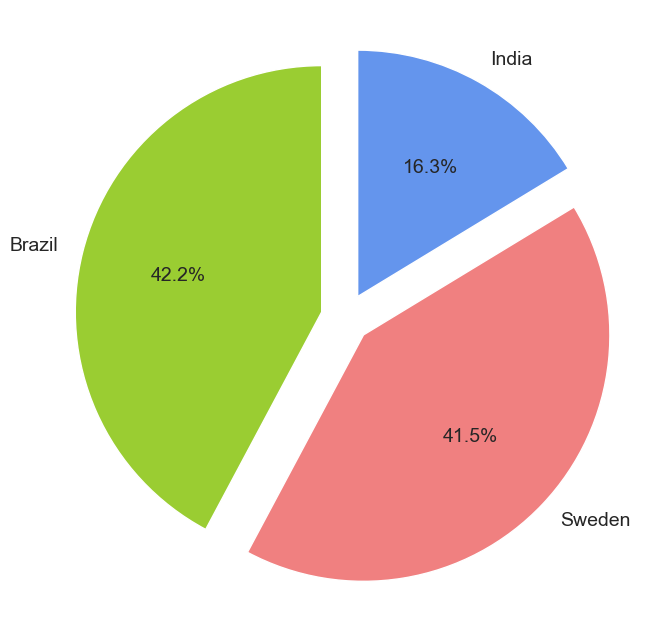

In [9]:
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df_all_features['country data collected'].value_counts().index.tolist()
# Convert value counts to list
sizes = df_all_features['country data collected'].value_counts().tolist()
# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0.1, 0.1, 0.1)
# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral', 'cornflowerblue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.savefig('./images/pie_division.png')
# plt.show()

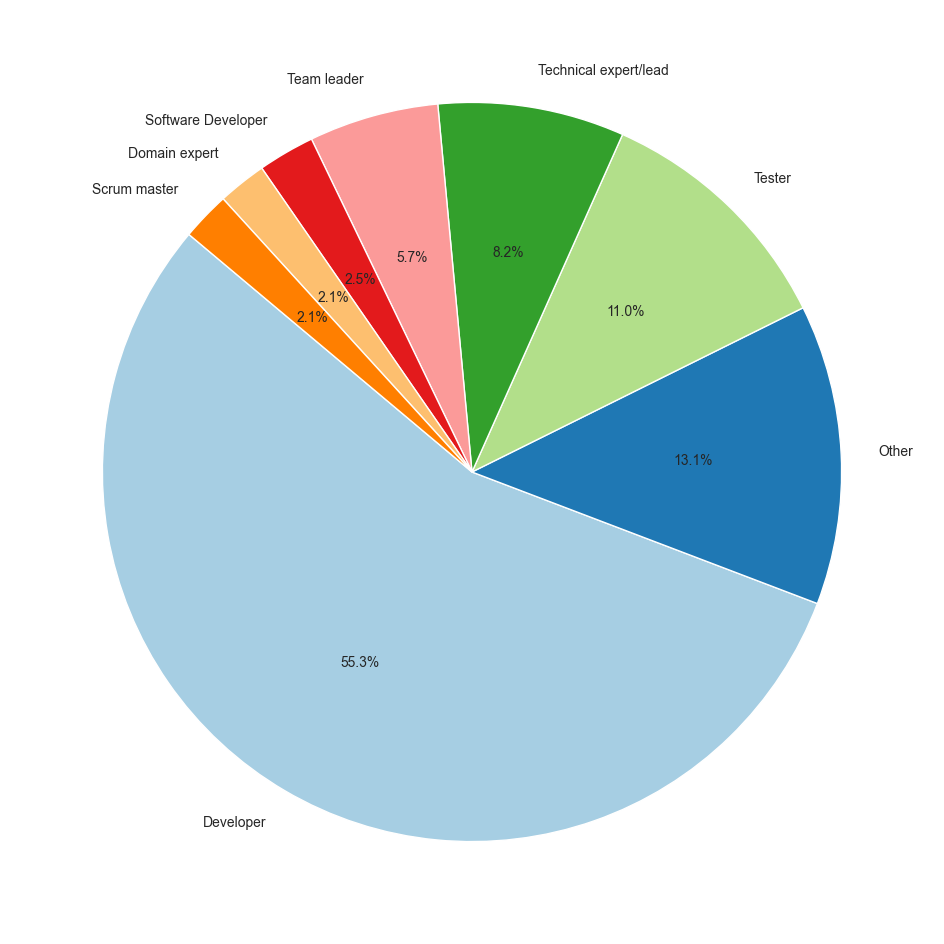

In [10]:
df_role = df_all_features.copy()
# Calculate the proportion of each role
role_counts = df_all_features['Role'].value_counts(normalize=True)
# Determine the threshold (e.g., 10%)
threshold = 0.02
# Identify roles with low proportions
low_proportion_roles = role_counts[role_counts < threshold].index
# Replace low proportion roles with 'Other'
df_role['Role'] = df_all_features['Role'].replace(low_proportion_roles, 'Other')
# Recalculate the role counts
role_counts_updated = df_role['Role'].value_counts()
# Plot the bar chart
plt.figure(figsize=(12, 12))
role_counts_updated.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.ylabel('')
plt.savefig('./images/role_distribution.png')
# plt.show()

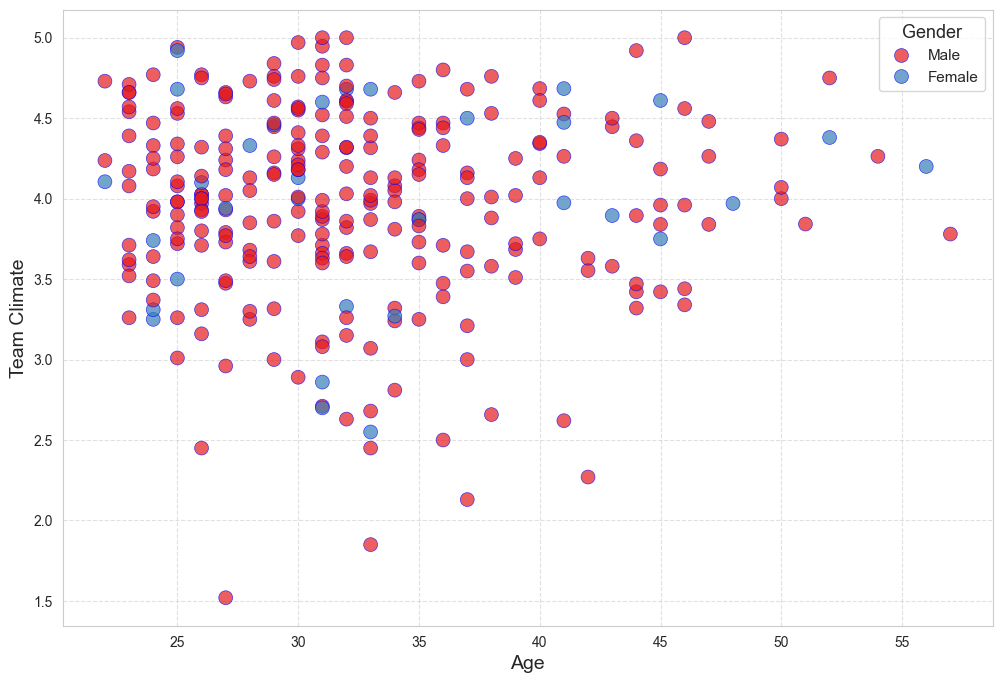

In [11]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Create a figure and axis
plt.figure(figsize=(12, 8))
# Create a scatter plot with enhanced aesthetics
sns.scatterplot(x='Age', y='Team_Climate', hue='Gender', data=df_all_features, palette='Set1', s=100, alpha=0.7, edgecolor='b', linewidth=0.5)
# Add titles and labels
plt.xlabel('Age', fontsize=14)
plt.ylabel('Team Climate', fontsize=14)
# Customize the legend
plt.legend(title='Gender', title_fontsize='13', fontsize='11')
# Improve gridlines
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('./images/age_gender_distribution.png')
# Show the plot
# plt.show()

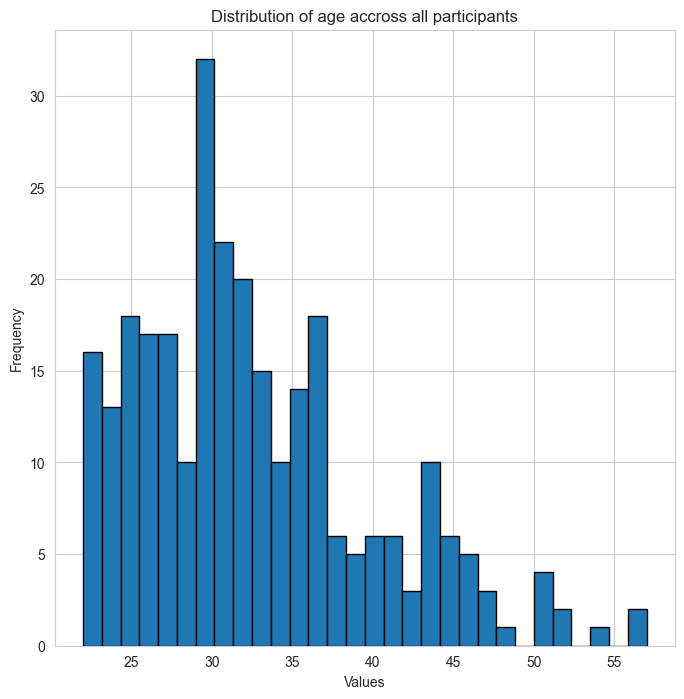

In [12]:
df_all_features['Age'].hist(bins=30, edgecolor='black')
plt.title('Distribution of age accross all participants')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.savefig('./images/age_distribution.png')
# plt.show()

In [75]:
outputs_comb = [['Vision', 'Task_Orientation', 'Support_for_innovation', 'Participative_safety', 'Team_Climate'], ['Team_Climate'], ['Vision', 'Task_Orientation', 'Support_for_innovation', 'Participative_safety']]
# X = df_bz.loc[df_bz['StandardizedTeamID'] == 'BR1']
X = df_se2
y = X[outputs_comb[2]]
X.index.name = 'MemberID'
X

,Data source,country data collected,Role,Team ID,Gender,Age,Country,Extraversion,Friendliness,Gregariousness,...,Emotionality,Adventurousness,Intellect,Liberalism,Vision,Task_Orientation,Support_for_innovation,Participative_safety,Team_Climate,StandardizedTeamID
MemberID,,,,,,,,,,,,,,,,,,,,,
0,Ericsson 2020,Sweden,Developer,COD2,Male,45,Sweden,39,47,36,...,65,28,27,34,3.272727,3.857143,4.000,4.250000,3.84,COD2
1,Ericsson 2020,Sweden,Developer,CFT8,Male,34,Sweden,2,13,14,...,43,1,87,53,3.909091,3.571429,4.000,3.750000,3.81,CFT8
2,Ericsson 2020,Sweden,Developer,CFT26,Male,35,Sweden,54,47,72,...,32,69,37,25,4.363636,4.285714,3.875,4.416667,4.24,CFT26
3,Ericsson 2020,Sweden,Developer,ADP-LOG,Male,42,sweden,64,57,55,...,32,86,27,62,2.272727,2.142857,2.000,2.666667,2.27,ADP-LOG
4,Ericsson 2020,Sweden,Team leader,CFT64,Male,28,Sweden,74,74,87,...,19,32,66,75,3.909091,4.000000,3.750,3.750000,3.85,CFT64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Ericsson 2020,Sweden,Developer,COD2,Female,24,Sweden,83,96,89,...,32,58,1,43,3.363636,4.000000,3.875,1.750000,3.25,COD2
70,Ericsson 2020,Sweden,Developer,CFT21,Male,44,England,15,38,11,...,54,48,1,79,4.818182,5.000000,4.875,5.000000,4.92,CFT21
71,Ericsson 2020,Sweden,Developer,CFT64,Male,46,Sweden,3,13,6,...,32,58,70,62,3.181818,3.571429,3.750,3.250000,3.44,CFT64


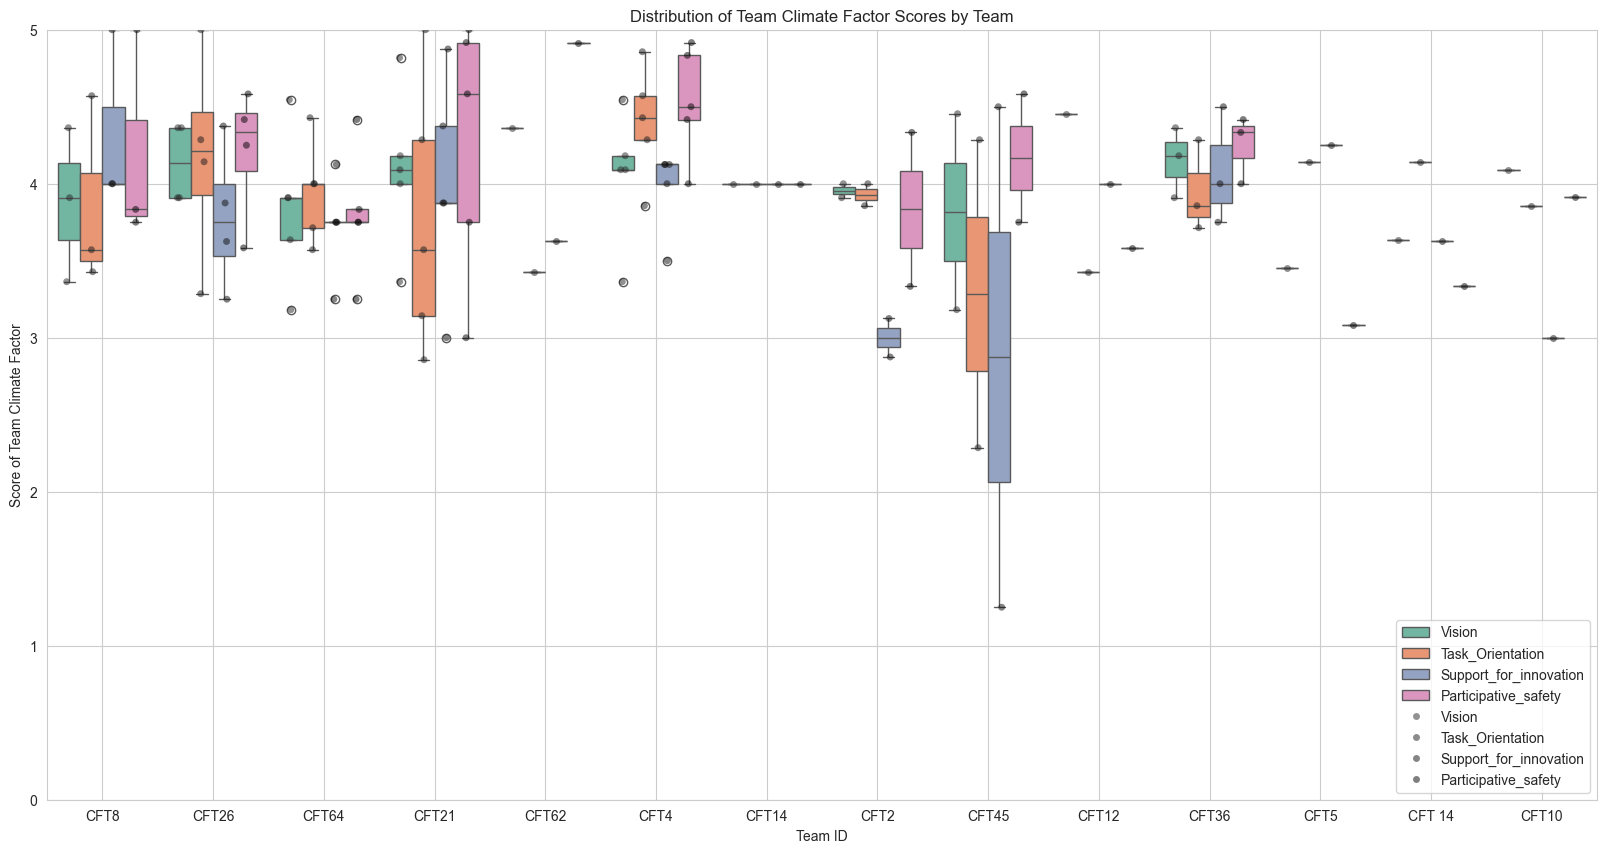

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data: each row represents a team member's scores

df = X
df_filtered = df[df['Team ID'].str.contains('CFT')]
# Melt the DataFrame to long format for seaborn
df_melted = df_filtered.reset_index().melt(id_vars=['Team ID', 'MemberID'], value_vars=['Vision', 'Task_Orientation', 'Support_for_innovation', 'Participative_safety'], var_name='Factor', value_name='Score')

# Create the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Team ID', y='Score', hue='Factor', data=df_melted, palette="Set2")

# Add individual data points to the boxplot
sns.stripplot(x='Team ID', y='Score', hue='Factor', data=df_melted, dodge=True, marker='o', alpha=0.5, palette='dark:black')

# Customize the plot
plt.ylim(0, 5)
plt.xlabel('Team ID')
plt.ylabel('Score of Team Climate Factor')
plt.title('Distribution of Team Climate Factor Scores by Team')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [80]:
# Group by TeamID and compute mean scores
grouped_df = df.groupby('Team ID').mean().reset_index()

# Bar plot of mean scores by team
plt.figure(figsize=(10, 6))
sns.barplot(x='Team ID', y='Score', data=grouped_df)
plt.title('Mean Scores by Team')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]